In [1]:
# Import relevant modules
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()
import os

In [2]:
world = pd.read_csv("covid-policy-tracker/data/OxCGRT_latest.csv")
world['Date'] = pd.to_datetime(world['Date'].astype(str), format='%Y%m%d')
print(world.dtypes)  # Pandas lacks support for null values as int64
world.head()

CountryName                                      object
CountryCode                                      object
Date                                     datetime64[ns]
C1_School closing                               float64
C1_Flag                                         float64
C2_Workplace closing                            float64
C2_Flag                                         float64
C3_Cancel public events                         float64
C3_Flag                                         float64
C4_Restrictions on gatherings                   float64
C4_Flag                                         float64
C5_Close public transport                       float64
C5_Flag                                         float64
C6_Stay at home requirements                    float64
C6_Flag                                         float64
C7_Restrictions on internal movement            float64
C7_Flag                                         float64
C8_International travel controls                

,CountryName,CountryCode,Date,C1_School closing,C1_Flag,C2_Workplace closing,C2_Flag,C3_Cancel public events,C3_Flag,C4_Restrictions on gatherings,...,H3_Contact tracing,H4_Emergency investment in healthcare,H5_Investment in vaccines,M1_Wildcard,ConfirmedCases,ConfirmedDeaths,StringencyIndex,StringencyIndexForDisplay,LegacyStringencyIndex,LegacyStringencyIndexForDisplay
0,Aruba,ABW,2020-01-01,0.0,NaN,0.0,NaN,0.0,NaN,0.0,...,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0
1,Aruba,ABW,2020-01-02,0.0,NaN,0.0,NaN,0.0,NaN,0.0,...,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0
2,Aruba,ABW,2020-01-03,0.0,NaN,0.0,NaN,0.0,NaN,0.0,...,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0
3,Aruba,ABW,2020-01-04,0.0,NaN,0.0,NaN,0.0,NaN,0.0,...,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0
4,Aruba,ABW,2020-01-05,0.0,NaN,0.0,NaN,0.0,NaN,0.0,...,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0


In [3]:
owidData = pd.read_csv('covid-19-data/public/data/owid-covid-data.csv')
owidData = owidData.rename(columns = {'iso_code' : 'CountryCode', 'location':'CountryName', 'date':'Date', 
                                      'new_cases':'NewCases', 'total_cases_per_million':'TotalCasesPerMillion', 
                                      'new_cases_per_million':'NewCasesPerMillion'})
owidData = owidData[['CountryCode', 'Date', 'NewCases', 'TotalCasesPerMillion', 'NewCasesPerMillion']]
owidData.Date = owidData.Date.astype('datetime64[ns]')
owidData.head()

,CountryCode,Date,NewCases,TotalCasesPerMillion,NewCasesPerMillion
0,ABW,2020-03-13,2,18.733,18.733
1,ABW,2020-03-20,2,37.465,18.733
2,ABW,2020-03-24,8,112.395,74.930
3,ABW,2020-03-25,5,159.227,46.831
4,ABW,2020-03-26,2,177.959,18.733


In [4]:
# Merge DataFrames
world = world.merge(owidData, on = ['CountryCode', 'Date'], how = 'outer')

In [5]:
china = world[world.CountryName == "China"]
singapore = world[world.CountryName == "Singapore"]
usa = world[world.CountryName == "United States"]
italy = world[world.CountryName == "Italy"]
skorea = world[world.CountryName == "South Korea"]
iran = world[world.CountryName == "Iran"]
taiwan = world[world.CountryName == "Taiwan"]
hk = world[world.CountryName == "Hong Kong"]
uk = world[world.CountryName == "United Kingdom"]

countries = [china, singapore, usa, italy, skorea, iran,
            taiwan, hk, uk]

countryNames = ['China', 'Singapore', 'USA', 'Italy', 'South Korea', 'Iran',
                'Taiwan', 'Hong Kong', 'United Kingdom']

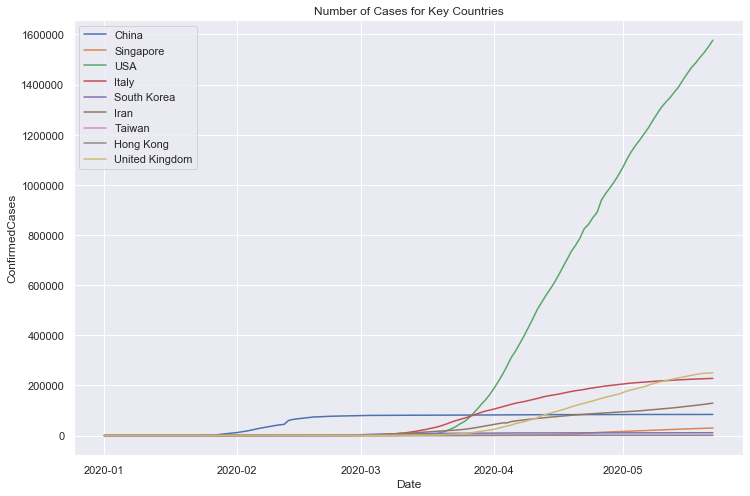

In [6]:
# Plot number of cases for each country

f, axes = plt.subplots(1, 1, figsize = (12, 8))
for i in range(len(countries)):
    ax = sb.lineplot(x = 'Date', y = "ConfirmedCases", data = countries[i], label = countryNames[i], legend = 'full')
    ax.set_title("Number of Cases for Key Countries")

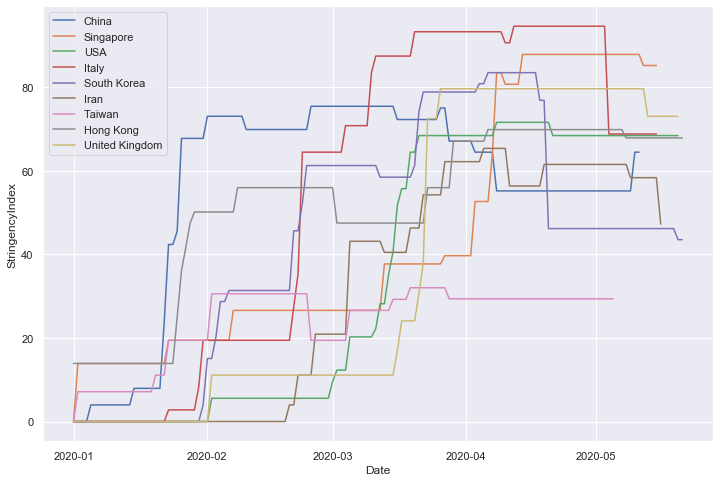

In [7]:
# Plot policy stringency index of each country

f, axes = plt.subplots(1, 1, figsize = (12, 8))
for i in range(len(countries)):
    sb.lineplot(x = 'Date', y = "StringencyIndex", data = countries[i], label = countryNames[i], legend = 'full')
    ax.set_title("Stringency of Policies in Key Countries")

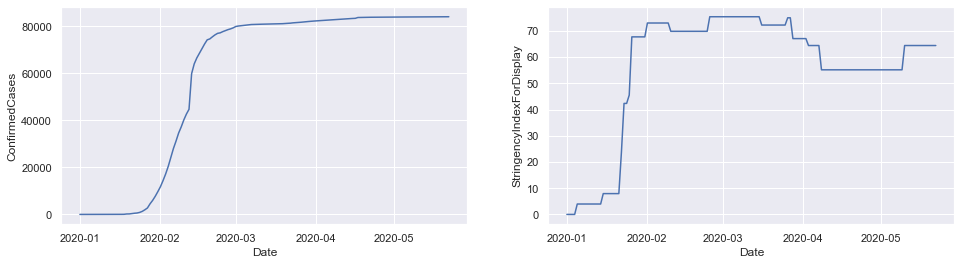

In [8]:
f, axes = plt.subplots(1, 2, figsize = (16, 4))
sb.lineplot(x = 'Date', y = "ConfirmedCases", data = china, ax = axes[0])
sb.lineplot(x = 'Date', y = "StringencyIndexForDisplay", data = china, ax = axes[1])

# Strategy
---
The aim here is to find out which policies are most effective. We want to take the following steps:
1. Single out the Top 100 countries with the most cases (this is just to remove any clutter from the dataset)
2. Of the Top 100 countries with the most cases, look at the number of new cases. For the countries with less than x number of new cases per day for 14 days, single them out. Do make sure to play around with the value of x, to see how this affects the policy relation later on. We will call these countries model countries.
3. Plot the policies of these new countries on a time series, with see if there are any trends. 
4. Compare the daily means of stringency for each policy of the model countries against the rest of the dataset. 

In [9]:
# Top 100 confirmed cases countries
from datetime import datetime, timedelta
end_date = (datetime.now() - timedelta(1)).strftime('%Y-%m-%d')
latestPull = world[world.Date == end_date]
top100 = latestPull.nlargest(50, 'ConfirmedCases')
print(top100.shape)
top100.head()

(50, 39)


,CountryName,CountryCode,Date,C1_School closing,C1_Flag,C2_Workplace closing,C2_Flag,C3_Cancel public events,C3_Flag,C4_Restrictions on gatherings,...,M1_Wildcard,ConfirmedCases,ConfirmedDeaths,StringencyIndex,StringencyIndexForDisplay,LegacyStringencyIndex,LegacyStringencyIndexForDisplay,NewCases,TotalCasesPerMillion,NewCasesPerMillion
22621,United States,USA,2020-05-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1577287.0,94702.0,NaN,68.41,NaN,70.00,25434.0,4765.179,76.839
18331,Russia,RUS,2020-05-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,317554.0,3099.0,NaN,71.71,NaN,72.14,8849.0,2176.004,60.637
3293,Brazil,BRA,2020-05-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,310087.0,20047.0,NaN,75.15,NaN,77.62,18508.0,1458.825,87.072
8161,United Kingdom,GBR,2020-05-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,250908.0,36042.0,NaN,73.01,NaN,72.62,2615.0,3696.020,38.520
11024,Italy,ITA,2020-05-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,228006.0,32486.0,NaN,68.78,NaN,65.24,642.0,3771.074,10.618


In [10]:
# Collect data from the last 14 days (incubation period)
end_date = (datetime.now() - timedelta(1)).strftime('%Y-%m-%d')
start_date = (datetime.now() - timedelta(15)).strftime('%Y-%m-%d')
mask = (world['Date'] > start_date) & (world['Date'] <= end_date)

incubationData = world.loc[mask]
print(incubationData.shape)
incubationData.head()

(3007, 39)


,CountryName,CountryCode,Date,C1_School closing,C1_Flag,C2_Workplace closing,C2_Flag,C3_Cancel public events,C3_Flag,C4_Restrictions on gatherings,...,M1_Wildcard,ConfirmedCases,ConfirmedDeaths,StringencyIndex,StringencyIndexForDisplay,LegacyStringencyIndex,LegacyStringencyIndexForDisplay,NewCases,TotalCasesPerMillion,NewCasesPerMillion
129,Aruba,ABW,2020-05-09,3.0,1.0,2.0,1.0,2.0,1.0,4.0,...,NaN,101.0,3.0,80.82,80.82,76.43,76.43,0.0,945.994,0.0
130,Aruba,ABW,2020-05-10,3.0,1.0,2.0,1.0,2.0,1.0,4.0,...,NaN,101.0,3.0,80.82,80.82,76.43,76.43,0.0,945.994,0.0
131,Aruba,ABW,2020-05-11,3.0,1.0,2.0,1.0,2.0,1.0,4.0,...,NaN,101.0,3.0,80.82,80.82,76.43,76.43,0.0,945.994,0.0
132,Aruba,ABW,2020-05-12,3.0,1.0,2.0,1.0,2.0,1.0,4.0,...,NaN,101.0,3.0,80.82,80.82,76.43,76.43,0.0,945.994,0.0
133,Aruba,ABW,2020-05-13,3.0,1.0,2.0,1.0,2.0,1.0,4.0,...,NaN,101.0,3.0,80.82,80.82,76.43,76.43,0.0,945.994,0.0


In [11]:
# Find the countries with the highest mean new cases in the last 14 days
mean = incubationData.groupby("CountryName").mean()
mean.nlargest(50, 'NewCasesPerMillion')

,C1_School closing,C1_Flag,C2_Workplace closing,C2_Flag,C3_Cancel public events,C3_Flag,C4_Restrictions on gatherings,C4_Flag,C5_Close public transport,C5_Flag,...,M1_Wildcard,ConfirmedCases,ConfirmedDeaths,StringencyIndex,StringencyIndexForDisplay,LegacyStringencyIndex,LegacyStringencyIndexForDisplay,NewCases,TotalCasesPerMillion,NewCasesPerMillion
CountryName,,,,,,,,,,,,,,,,,,,,,
Qatar,3.000000,1.000000,2.000000,1.000000,2.000000,1.000000,4.000000,1.000000,2.000000,1.0,...,NaN,2.899707e+04,14.428571,90.740000,90.740000,90.000000,90.000000,1411.500000,10064.723214,489.923857
Kuwait,3.000000,1.000000,3.000000,0.900000,2.000000,1.000000,4.000000,1.000000,2.000000,1.0,...,NaN,1.258779e+04,90.785714,99.101000,99.357857,96.426000,96.630000,860.142857,2947.570571,201.412214
Bahrain,3.000000,1.000000,2.000000,1.000000,2.000000,1.000000,4.000000,1.000000,1.000000,1.0,...,NaN,6.286000e+03,10.357143,86.770000,86.770000,85.240000,85.240000,283.928571,3694.207143,166.861500
Chile,3.000000,1.000000,2.000000,1.000000,2.000000,1.000000,3.000000,1.000000,0.000000,NaN,...,NaN,3.906064e+04,404.071429,78.830000,78.830000,76.430000,76.430000,2357.142857,2043.325714,123.306000
Peru,3.000000,1.000000,3.000000,1.000000,2.000000,1.000000,4.000000,1.000000,2.000000,1.0,...,NaN,8.317671e+04,2379.285714,97.880000,97.728571,97.140000,97.140000,3588.785714,2522.658857,108.844000
Singapore,3.000000,1.000000,2.428571,1.000000,2.000000,1.000000,4.000000,1.000000,1.000000,1.0,...,NaN,2.614307e+04,21.285714,86.315714,85.791538,84.630000,83.923846,633.785714,4468.639214,108.333000
Belarus,0.000000,NaN,0.000000,NaN,0.000000,NaN,0.000000,NaN,0.000000,NaN,...,NaN,2.724571e+04,153.071429,15.470000,15.470000,18.100000,18.100000,943.071429,2883.351643,99.803000
United Arab Emirates,3.000000,1.000000,2.000000,0.500000,2.000000,1.000000,4.000000,1.000000,1.000000,1.0,...,NaN,2.159914e+04,210.000000,83.421111,81.406429,83.256667,82.265000,761.285714,2183.849286,76.972143
San Marino,3.000000,1.000000,2.000000,1.000000,2.000000,1.000000,4.000000,1.000000,0.000000,NaN,...,NaN,6.447857e+02,41.000000,71.420000,71.420000,68.810000,68.810000,2.571429,18998.930643,75.768214


In [12]:
# Isolate countries that have had more than 30 new cases on a single day for the last 14 days
activeCountries = []
for i in range(len(incubationData['NewCases'])):
    if incubationData["NewCases"].iloc[i] >= 50 and incubationData["CountryName"].iloc[i] not in activeCountries:
        activeCountries.append(incubationData["CountryName"].iloc[i])

print(activeCountries)
print("Active Countries: {}" .format(len(activeCountries)))

['Afghanistan', 'United Arab Emirates', 'Argentina', 'Austria', 'Azerbaijan', 'Belgium', 'Benin', 'Bangladesh', 'Bulgaria', 'Bahrain', 'Bosnia and Herzegovina', 'Belarus', 'Bolivia', 'Brazil', 'Central African Republic', 'Canada', 'Switzerland', 'Chile', "Cote d'Ivoire", 'Cameroon', 'Democratic Republic of Congo', 'Congo', 'Colombia', 'Czech Republic', 'Germany', 'Djibouti', 'Denmark', 'Dominican Republic', 'Algeria', 'Ecuador', 'Egypt', 'Spain', 'Finland', 'France', 'Gabon', 'United Kingdom', 'Ghana', 'Guatemala', 'Honduras', 'Hungary', 'Indonesia', 'India', 'Ireland', 'Iran', 'Iraq', 'Israel', 'Italy', 'Japan', 'Kazakhstan', 'Kenya', 'Kyrgyz Republic', 'Kuwait', 'Lebanon', 'Morocco', 'Moldova', 'Mexico', 'Mongolia', 'Mauritania', 'Malaysia', 'Nigeria', 'Netherlands', 'Norway', 'Nepal', 'Oman', 'Pakistan', 'Panama', 'Peru', 'Philippines', 'Poland', 'Puerto Rico', 'Portugal', 'Paraguay', 'Qatar', 'Romania', 'Russia', 'Saudi Arabia', 'Sudan', 'Senegal', 'Singapore', 'El Salvador', 'Soma

In [13]:
world.groupby("CountryName").mean()

,C1_School closing,C1_Flag,C2_Workplace closing,C2_Flag,C3_Cancel public events,C3_Flag,C4_Restrictions on gatherings,C4_Flag,C5_Close public transport,C5_Flag,...,M1_Wildcard,ConfirmedCases,ConfirmedDeaths,StringencyIndex,StringencyIndexForDisplay,LegacyStringencyIndex,LegacyStringencyIndexForDisplay,NewCases,TotalCasesPerMillion,NewCasesPerMillion
CountryName,,,,,,,,,,,,,,,,,,,,,
Afghanistan,1.457746,1.000,1.246479,0.000000,1.154930,0.792683,1.323944,1.000000,0.774648,0.0,...,NaN,991.699248,26.992481,34.388239,34.681538,36.230634,36.505105,65.233083,25.475038,1.675729
Albania,1.442748,1.000,0.961832,0.000000,0.961832,1.000000,1.358779,1.000000,0.900763,0.0,...,NaN,483.453333,19.653333,40.426641,42.525912,40.135496,42.110876,12.920000,167.994080,4.489467
Algeria,1.422222,1.000,0.922481,0.468085,0.977778,1.000000,1.303030,0.000000,0.728682,1.0,...,NaN,1438.297101,146.405797,33.163411,35.352593,35.427597,37.673037,56.000000,32.799609,1.277080
Andorra,1.415493,1.000,1.232394,1.000000,0.492958,1.000000,0.000000,NaN,0.408451,1.0,...,NaN,540.128571,28.028571,26.255211,26.465594,33.253592,33.518881,10.885714,6990.598229,140.887943
Angola,1.182482,1.000,0.941606,1.000000,0.744526,1.000000,1.467153,1.000000,0.569343,1.0,...,NaN,25.000000,1.774194,36.170803,38.077343,35.786861,37.662098,0.935484,0.760581,0.028435
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,1.381295,1.000,1.381295,0.984375,0.978417,1.000000,1.438849,1.000000,0.000000,NaN,...,NaN,263.057971,6.768116,41.279353,42.536993,40.798201,41.974755,12.782609,9.251029,0.449580
Vietnam,2.181818,0.625,0.924242,0.812500,1.424242,0.478723,1.181818,0.851064,0.553030,1.0,...,NaN,122.539568,0.000000,47.660606,48.596232,53.194167,54.121377,2.265734,1.258906,0.023935
Yemen,1.316547,1.000,0.000000,NaN,0.906475,1.000000,0.000000,NaN,0.000000,NaN,...,NaN,36.511628,5.930233,19.641367,20.608881,23.103094,24.108601,4.488372,1.224372,0.150581


In [14]:
countries = world["CountryName"].unique()
rcvdCountries = list(set(countries) - set(activeCountries))
print("Low Impact Countries: " + str(len(rcvdCountries)))
rcvdCountries.sort()
print(rcvdCountries)

Low Impact Countries: 75
['Albania', 'Andorra', 'Angola', 'Aruba', 'Australia', 'Barbados', 'Belize', 'Bermuda', 'Bhutan', 'Botswana', 'Brunei', 'Burkina Faso', 'Burundi', 'Cape Verde', 'China', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Dominica', 'Estonia', 'Eswatini', 'Ethiopia', 'Gambia', 'Georgia', 'Greece', 'Greenland', 'Guam', 'Guyana', 'Hong Kong', 'Iceland', 'Jamaica', 'Jordan', 'Kosovo', 'Laos', 'Lesotho', 'Liberia', 'Libya', 'Lithuania', 'Luxembourg', 'Macao', 'Madagascar', 'Malawi', 'Mali', 'Mauritius', 'Mozambique', 'Myanmar', 'Namibia', 'New Zealand', 'Nicaragua', 'Niger', 'Palestine', 'Papua New Guinea', 'Rwanda', 'San Marino', 'Seychelles', 'Sierra Leone', 'Slovak Republic', 'Slovenia', 'Solomon Islands', 'South Korea', 'Sri Lanka', 'Suriname', 'Syria', 'Taiwan', 'Tanzania', 'Thailand', 'Trinidad and Tobago', 'Tunisia', 'Turkmenistan', 'Uganda', 'Uruguay', 'Vietnam', 'Yemen', 'Zimbabwe']


Take Hong Kong, China, New Zealand, South Korea as positive examples

Take USA, UK, Spain, Iran as negative examples

In [15]:
def plotClosure(country):
    f, axes = plt.subplots(1, 2, figsize = (16, 6))
    sb.lineplot(x = 'Date', y = 'C1_School closing', data = world[world.CountryName == country], 
                label = 'School Closure', ax = axes[0])
    sb.lineplot(x = 'Date', y = 'C2_Workplace closing', data = world[world.CountryName == country], 
                label = 'Workplace Closure', ax = axes[0])
    sb.lineplot(x = 'Date', y = 'C3_Cancel public events', data = world[world.CountryName == country], 
                label = 'Public Event Cancellation', ax = axes[0])
    sb.lineplot(x = 'Date', y = 'C4_Restrictions on gatherings', data = world[world.CountryName == country], 
                label = 'Gathering Restrictions', ax = axes[0])
    ax = sb.lineplot(x = 'Date', y = 'C5_Close public transport', data = world[world.CountryName == country], 
                label = 'Public Transport Closure', ax = axes[0])
    ax.set_title("Closure Policies in " + country)
    
    ax = sb.lineplot(x = 'Date', y = 'ConfirmedCases', data = world[world.CountryName == country], ax = axes[1])
    ax.set_title("Confirmed Cases in " + country)

# Recovery Examples

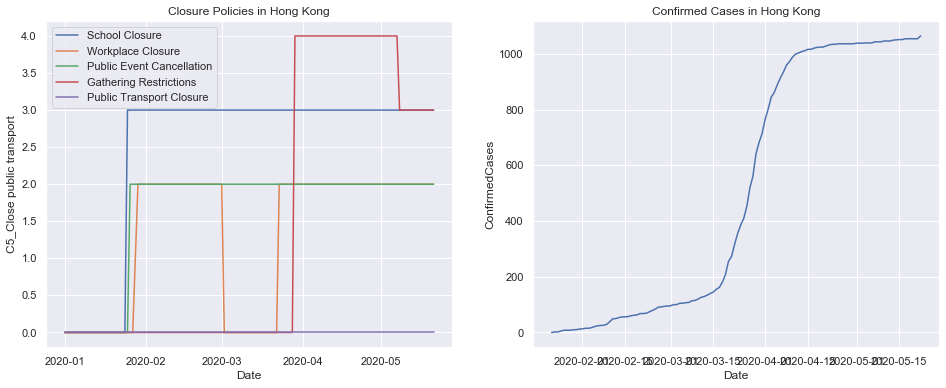

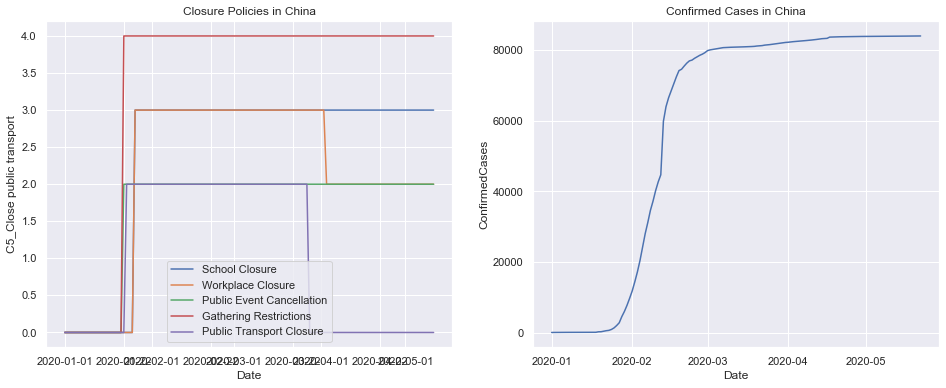

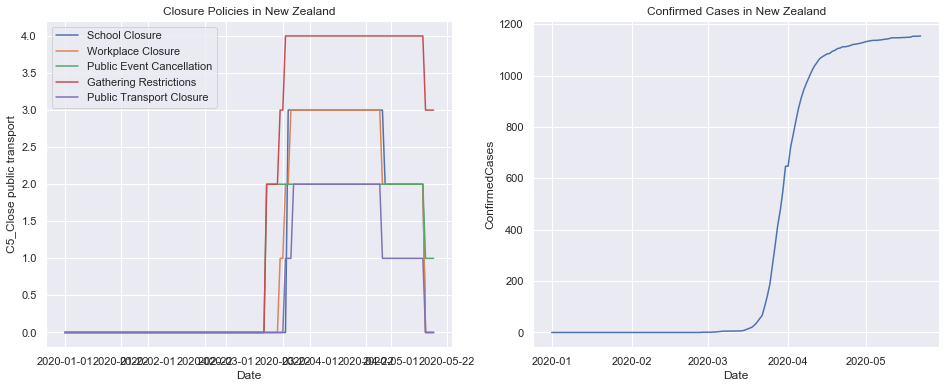

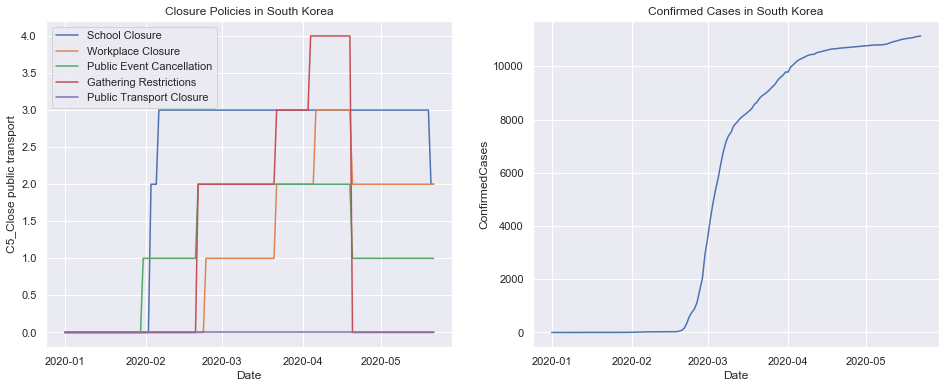

In [16]:
# Positive examples:
countries = ['Hong Kong', 'China', 'New Zealand', 'South Korea']
for country in countries:
    plotClosure(country)

# Absolute Highest Numbers

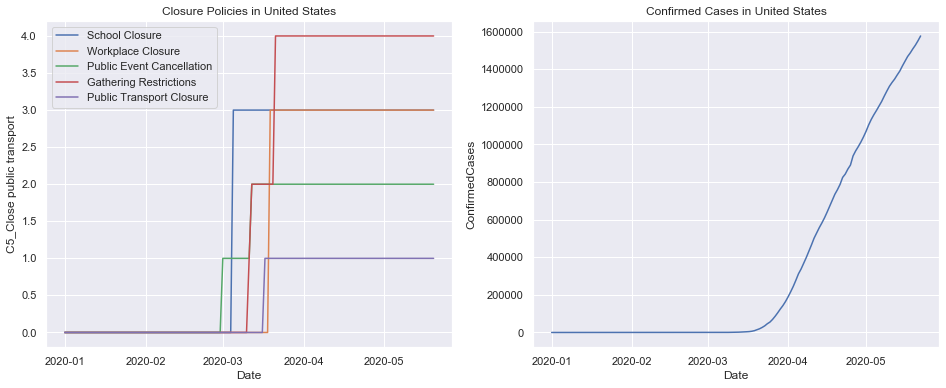

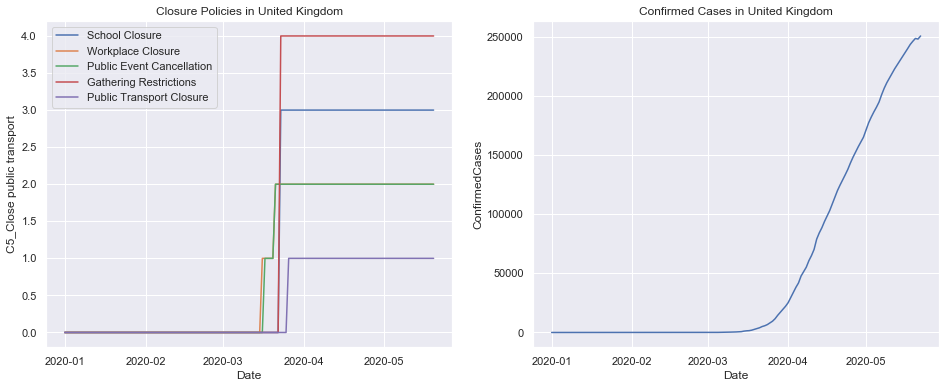

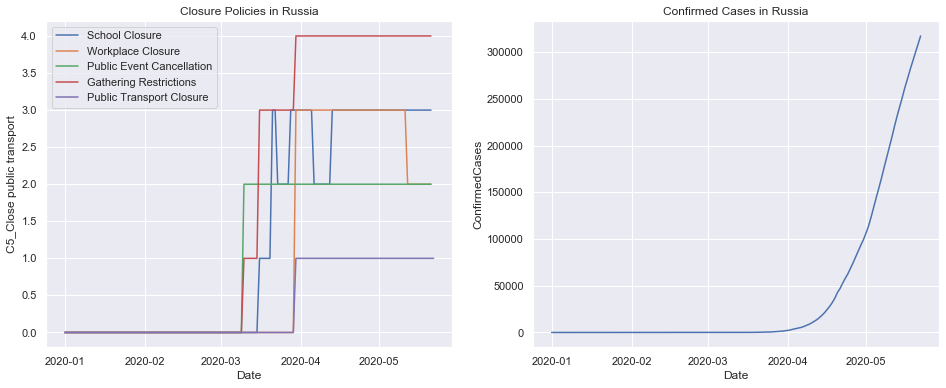

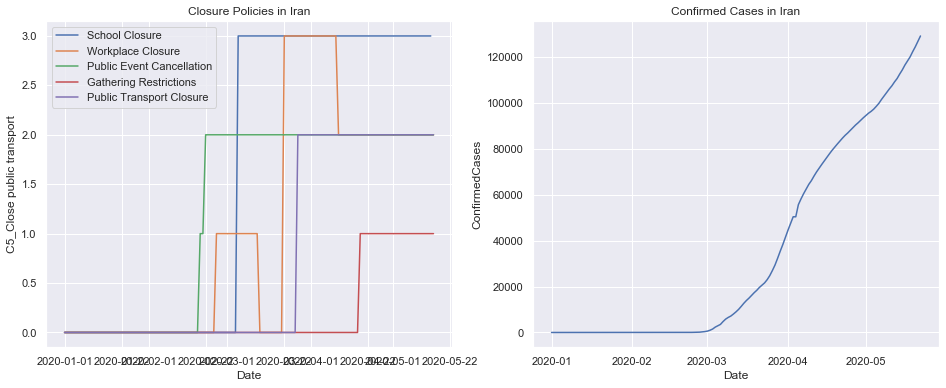

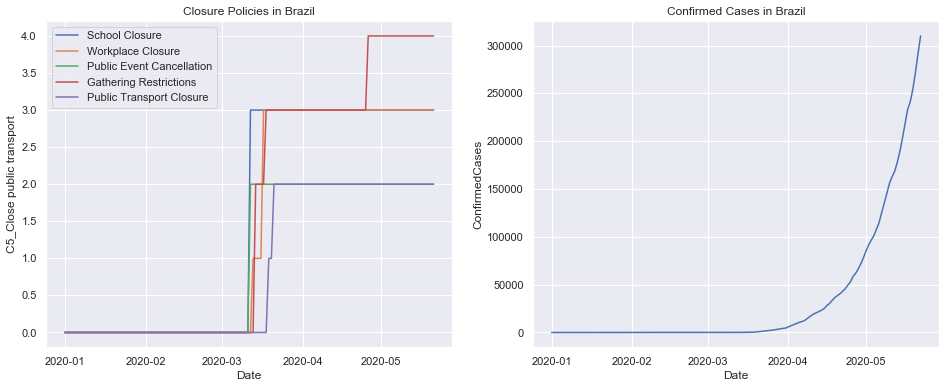

In [31]:
# Plot negative examples:
countries = ('United States', 'United Kingdom', 'Russia', 'Iran', 'Brazil')
for country in countries:
    plotClosure(country)

# Relative Highest Numbers

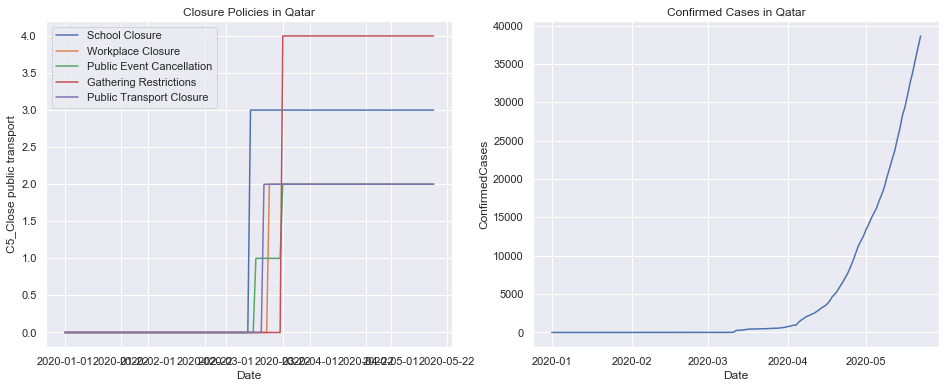

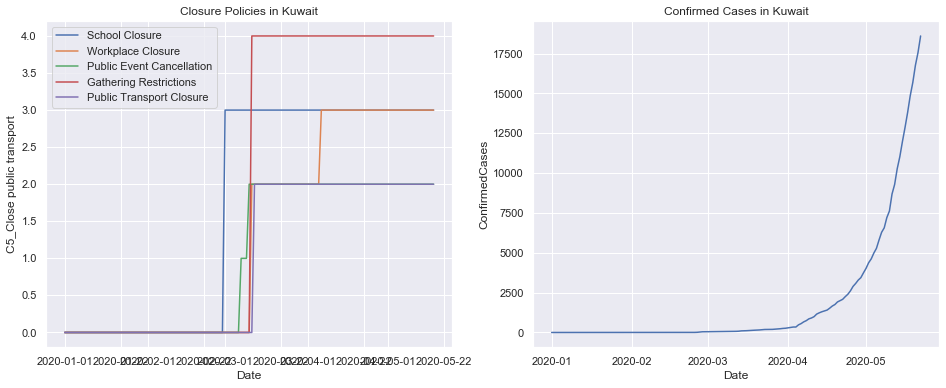

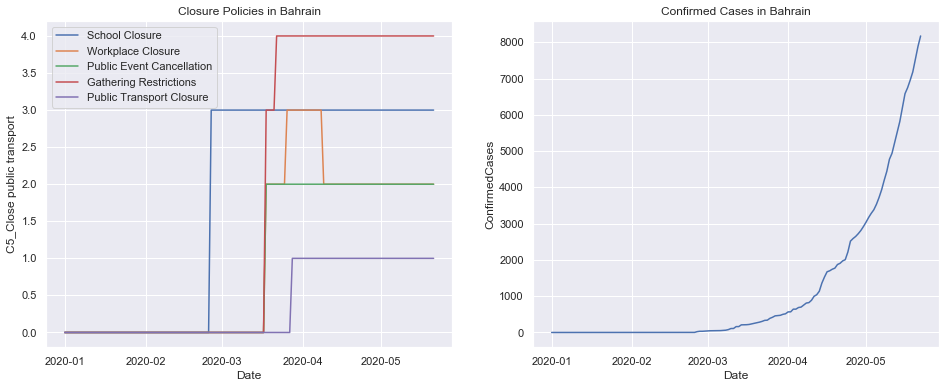

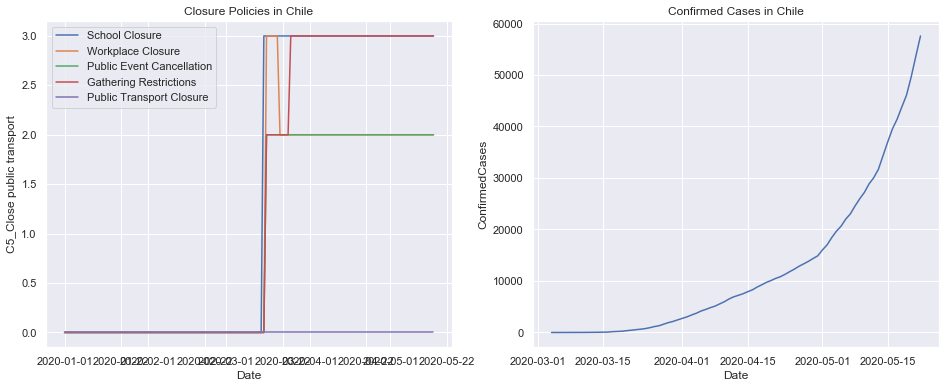

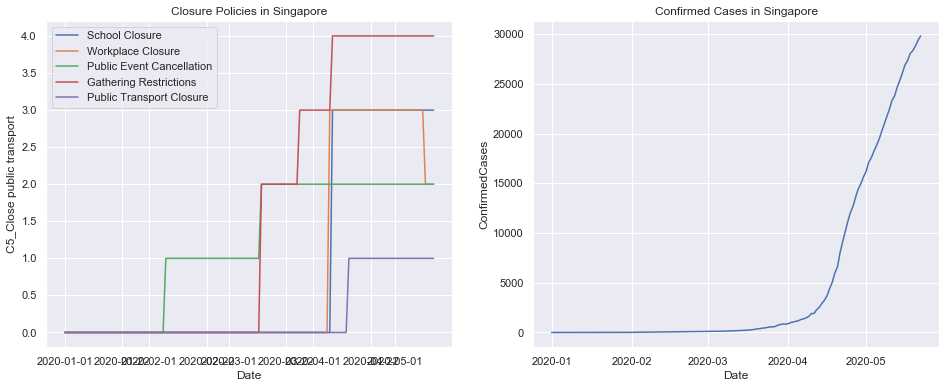

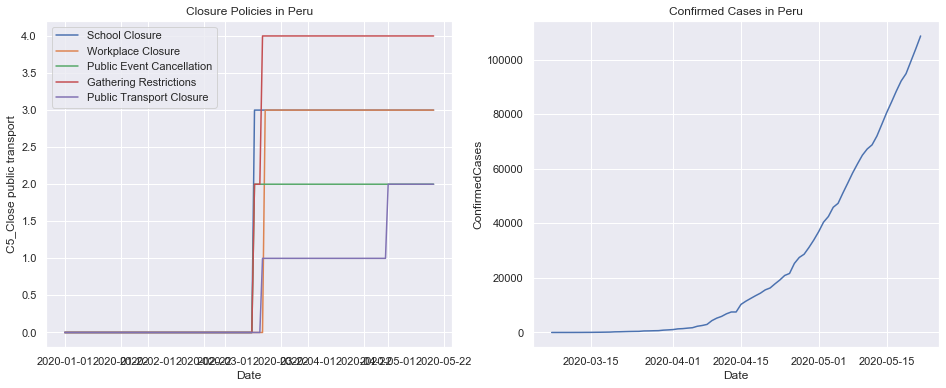

In [18]:
countries = ['Qatar', 'Kuwait', 'Bahrain', 'Chile', 'Singapore', 'Peru']
for country in countries:
    plotClosure(country)

In [19]:
import altair as alt

In [30]:
import altair as alt
from vega_datasets import data

source = data.cars()

brush = alt.selection(type='interval')

points = alt.Chart(source).mark_point().encode(
    x='Horsepower:Q',
    y='Miles_per_Gallon:Q',
    color=alt.condition(brush, 'Origin:N', alt.value('lightgray'))
).add_selection(
    brush
)

bars = alt.Chart(source).mark_bar().encode(
    y='Origin:N',
    color='Origin:N',
    x='count(Origin):Q'
).transform_filter(
    brush
)

points & bars

alt.VConcatChart(...)